In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_digits

In [2]:
data = load_digits()

In [29]:
X = data.images
X_test = data.images[1501:]
y = data.target
y_test = data.target[1501:]
print(X.shape, y.shape)
print(X_test.shape, y_test.shape)

(1797, 8, 8) (1797,)
(296, 8, 8) (296,)


In [4]:
def distance(p1,p2):
  return np.sqrt(np.sum((p1-p2)**2))

In [5]:
def knn(X, Y, p, k):
  m = X.shape[0]
  p = p.reshape((64,))
  val = []
  for i in range(m):
    xi = X[i]
    xi = xi.reshape((64,))
    dist = distance(p,xi)
    val.append((dist,Y[i]))
  val = sorted(val,key = lambda x:x[0])[:k]
  val = np.asarray(val)
  new_vals = np.unique(val[:,1],return_counts=True)
  index = new_vals[1].argmax()
  output = new_vals[0][index]
  return output

In [32]:
error = []
for k in range(1,30):
  predict = []
  for i in range(X_test.shape[0]):
    pred = knn(X,y,X_test[i],k)
    predict.append(pred)
  predict = np.array(predict)
  err = ((predict != y_test).sum() / y_test.shape[0])
  error.append(err)

In [34]:
error = [x/100 for x in accuracy]
print(error)

[0.0, 0.008903728436282694, 0.00667779632721202, 0.007790762381747357, 0.009460211463550361, 0.01001669449081803, 0.009460211463550361, 0.010573177518085699, 0.011129660545353366, 0.014468558708959377, 0.012242626599888704, 0.012242626599888704, 0.01335559265442404, 0.013912075681691706, 0.014468558708959377, 0.015581524763494715, 0.016138007790762382, 0.01669449081803005, 0.016138007790762382, 0.017807456872565387, 0.018363939899833055, 0.018920422927100722, 0.02058987200890373, 0.02170283806343907, 0.02448525319977741, 0.02337228714524207, 0.02448525319977741, 0.02615470228158041, 0.027267668336115748]


In [35]:
predict = []
for i in range(X_test.shape[0]):
  pred = knn(X,y,X_test[i],5)
  predict.append(pred)
predict = np.array(predict)
acc = ((predict == y_test).sum() / y_test.shape[0])*100
print(acc)

98.64864864864865


In [30]:
acc = ((predict == y_test).sum() / y_test.shape[0])*100
print(acc)

98.64864864864865


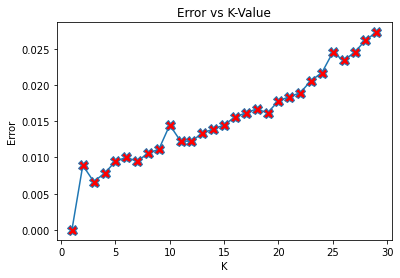

In [44]:
plt.plot(range(1,30),error,marker='X',markerfacecolor='red',markersize=10)
plt.title("Error vs K-Value", size = 12)
plt.xlabel("K", size = 10)
plt.ylabel("Error",size = 10)
plt.show()

#Sklearn

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_digits

In [7]:
data = load_digits()

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [17]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
n_examples, wX, hX = X_train.shape
n_test, wx, hx = X_test.shape

(1437, 8, 8) (1437,)
(360, 8, 8) (360,)


In [19]:
X_train = X_train.reshape((n_examples,wX*hX))
X_test = X_test.reshape((n_test,wx*hx))

In [21]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 3,metric='minkowski',p=2)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [22]:
y_pred = classifier.predict(X_test)

In [23]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,y_pred)
print("Accuracy:",result2)

Confusion Matrix:
[[42  0  0  0  0  0  0  0  0  0]
 [ 0 39  0  0  0  0  0  0  0  0]
 [ 0  0 35  0  0  0  0  1  0  0]
 [ 0  0  0 35  0  0  0  0  0  1]
 [ 0  0  0  0 36  0  0  0  0  0]
 [ 0  0  0  0  0 46  0  0  0  0]
 [ 0  0  0  0  0  0 30  0  0  0]
 [ 0  0  0  0  0  0  0 30  0  0]
 [ 0  1  0  0  0  0  0  0 32  1]
 [ 0  0  0  0  1  0  0  0  0 30]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        42
           1       0.97      1.00      0.99        39
           2       1.00      0.97      0.99        36
           3       1.00      0.97      0.99        36
           4       0.97      1.00      0.99        36
           5       1.00      1.00      1.00        46
           6       1.00      1.00      1.00        30
           7       0.97      1.00      0.98        30
           8       1.00      0.94      0.97        34
           9       0.94      0.97      0.95        31

    accuracy                    